In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
files.upload()

Saving playstore-analysis Data Set.csv to playstore-analysis Data Set.csv


{'playstore-analysis Data Set.csv': b'App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver\r\nPhoto Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up\r\nColoring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up\r\n"U Launcher Lite \xe2\x80\x93 FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up\r\nSketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up\r\nPixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up\r\nPaper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,

In [0]:
df=pd.read_csv("playstore-analysis Data Set.csv")
df.shape

(10841, 13)

In [0]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**Tasks**

1. Data clean up – Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable
b.

In [0]:
df=df.dropna(subset = ['Rating'])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


b. Check the null values for the Android Ver column.

i. Are all 3 records having the same problem?

In [0]:
boolean = pd.isnull(df["Android Ver"])
df1=df[boolean]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [0]:
df=df.dropna(how='any', subset=['Content Rating'])

In [0]:
df.shape

(9366, 13)

In [0]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

iii. Replace remaining missing values with the mode

In [0]:
df["Android Ver"].fillna("4.1 and up" ,inplace = True) #add mode in to NaN value inn Android Ver


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


c. Current ver – replace with most common value

In [0]:
warnings.filterwarnings("ignore")
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0]) # Current Current Ver is filled iwth mode value

In [0]:
df.shape

(9366, 13)

2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

Review and Installs need to be converted in numeric data

b. Price variable – remove $ sign and convert to float

In [0]:
warnings.filterwarnings("ignore")

df['Price'] = df['Price'].replace({'\$':''}, regex = True)  # removed $ from Price column

df['Price'] = df['Price'].astype (float) # Float type

In [0]:
type(df.Price)

pandas.core.series.Series

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [0]:
df['Installs'] = df['Installs'].str.replace(r'[^\w\s]+', '') # Removed "+" and "," sign from Installs

d. Convert all other identified columns to numeric

In [0]:
df['Reviews'] = df['Reviews'].astype (float)  #data type converted into float
df['Installs'] = df['Installs'].astype(float)


3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.

i. Are there any such records? Drop if so.

In [0]:
df.drop(df[df['Rating'] <=1.0].index, inplace = True) # Removed row which rating was below 1.0


In [0]:
df.shape

(9350, 13)

b. Reviews should not be more than installs as only those who installed can review the
app.

i. Are there any such records? Drop if so.

In [0]:
df.drop(df[df['Reviews'] >= df['Installs']].index, inplace =True) #drop all record which contain more reviews then Install

In [0]:
df.shape

(9341, 13)

4. Identify and handle outliers –

a. Price column

i. Make suitable plot to identify outliers in price

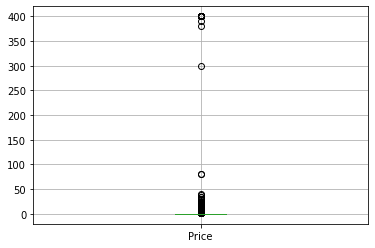

In [0]:
df.boxplot(column =['Price']) 

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [0]:
df.drop( df[ df['Price'] >= 200.00 ].index , inplace=True) #Droped All record which cost is More then 200$

In [0]:
df.shape

(9326, 13)

iii. After dropping the useless records, make the suitable plot again to identify
outliers

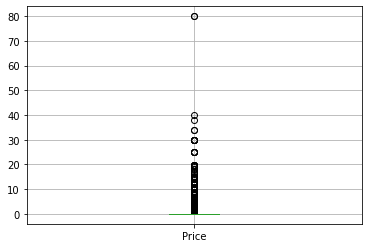

In [0]:
df.boxplot(column =['Price']) 

iv. Limit data to records with price < $30

In [0]:
df.drop( df[ df['Price'] >= 30.00 ].index , inplace=True) # Maximum Price Is set To 30$

In [0]:
df.shape

(9320, 13)

b. Reviews column

i. Make suitable plot

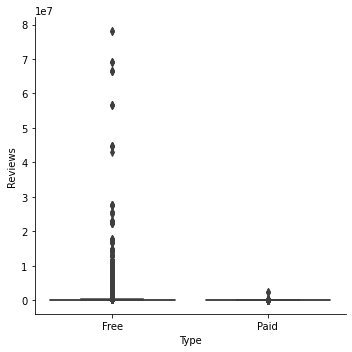

In [0]:
sns.catplot(x="Type",y="Reviews",kind='box',data=df)

ii. Limit data to apps with < 1 Million reviews

In [0]:
df.drop( df[ df['Reviews'] >= 1000000.00 ].index , inplace=True) # Limit set to data is maximum 1 million Reviews


In [0]:
df.shape

(8616, 13)

c. Installs

i. What is the 95th percentile of the installs?

In [0]:
 df['Installs'].quantile(0.95) 


10000000.0

ii. Drop records having a value more than the 95th percentile

In [0]:
df.drop( df[ df['Installs'] >= 10000000.00 ].index , inplace=True)


In [0]:
df.shape

(7240, 13)

**Data analysis to answer business questions**
5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?

a. How do you explain this?

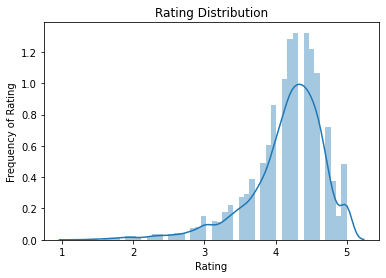

In [0]:
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency of Rating")
sns.distplot(df['Rating'].values);
plt.show()

Rating is left skewed type, a chart is made of frequencies. It shows data distribution is more biased with right side

b. What is the implication of this on your analysis?

The implication of my analysis is the Maximum Apps are rated between 3.5 to 5

6. What are the top Content Rating values?

a. Are there any values with very few records?

In [0]:
df['Content Rating'].count()

7240

In [0]:
counts = df.pivot_table(index=['Content Rating'], aggfunc='size')
print(counts)

Content Rating
Adults only 18+       3
Everyone           5896
Everyone 10+        249
Mature 17+          345
Teen                746
Unrated               1
dtype: int64


Their are two values with few records i.e. Adults only 18+ and Unrated

b. If yes, drop those as they won’t help in the analysis

In [0]:
df = df.groupby('Content Rating').filter(lambda x: len(x) >100)

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.000000,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.000000,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.000000,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.000000,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619.000000,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2600.000000,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.000000,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.000000,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

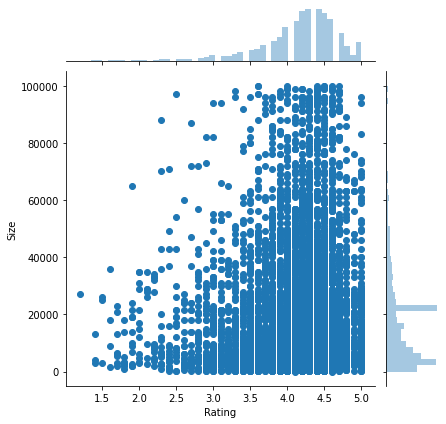

In [0]:
sns.jointplot(df['Rating'],df['Size'])

b. Do you see any patterns? yes

c. How do you explain the pattern?

as the size increases the decreases, and till the siz 60k and rating around 4 to 4.7 approx. more entries are available

8. Effect of price on rating

a. Make a jointplot (with regression line)

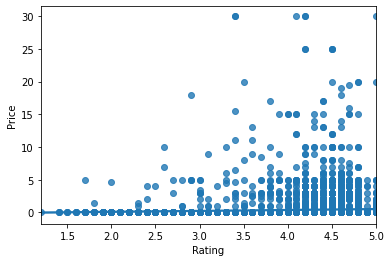

In [0]:
sns.regplot(df['Rating'],df['Price'])

b. What pattern do you see?


c. How do you explain the pattern?


d. Replot the data, this time with only records with price > 0


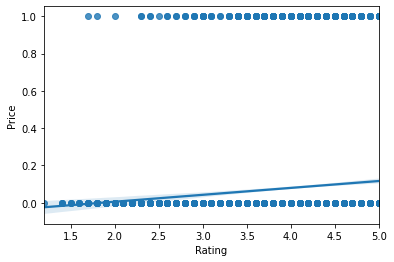

In [0]:
sns.regplot(df['Rating'],df['Price']>0)

e. Does the pattern change?


f. What is your overall inference on the effect of price on the rating

9. Look at all the numeric interactions together –

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

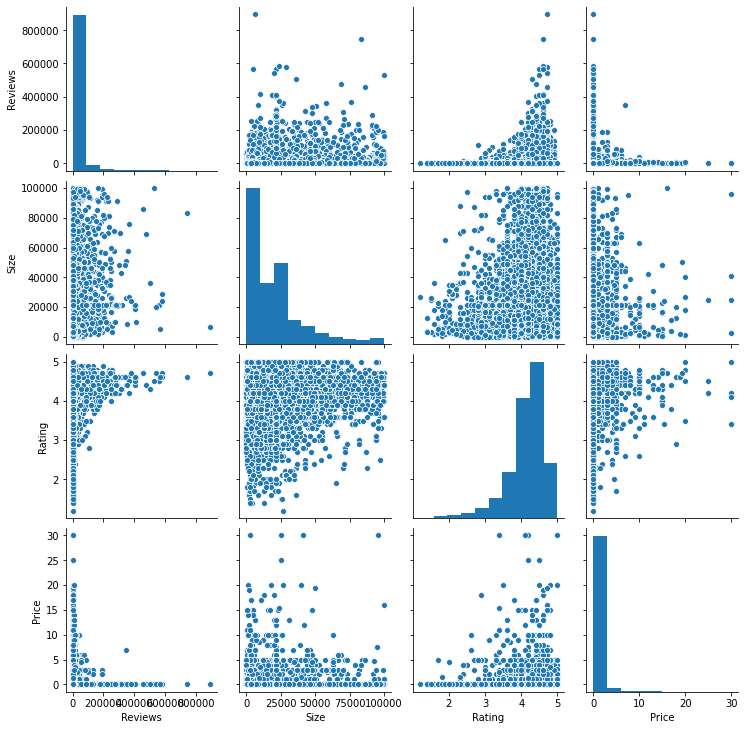

In [0]:
sns.pairplot(df, vars=[ 'Reviews', 'Size', 'Rating', 'Price'])

10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

<BarContainer object of 7236 artists>

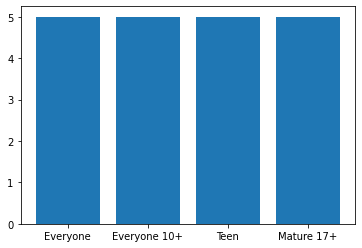

In [0]:
plt.bar(df['Content Rating'],df['Rating'])

In [0]:
df['Content Rating'].unique()

array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+'], dtype=object)

b. Which metric would you use? Mean? Median? Some other quantile?


we must use meadian in this case as we are having Outliers in rating.Median is the best measure of central tendency in case of outliers.

c. Choose the right metric and plot


In [0]:
plt.boxplot(df['Rating'])
plt.show()

11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination


c. Make a heatmap of this

i. Annotated


ii. Greens color map


d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?